<a href="https://colab.research.google.com/github/AnamAtr/Telco-Customer-Churn-Analysis-Predicting-Monthly-Charges/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
pd.options.display.max_rows
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [21]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.columns = df.columns.str.title()
df.head(3)

,Customerid,Gender,Seniorcitizen,Partner,Dependents,Tenure,Phoneservice,Multiplelines,Internetservice,Onlinesecurity,Onlinebackup,Deviceprotection,Techsupport,Streamingtv,Streamingmovies,Contract,Paperlessbilling,Paymentmethod,Monthlycharges,Totalcharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [22]:
df.nunique()

,0
Customerid,7043
Gender,2
Seniorcitizen,2
Partner,2
Dependents,2
Tenure,73
Phoneservice,2
Multiplelines,3
Internetservice,3
Onlinesecurity,3


In [23]:
df.duplicated().sum()

np.int64(0)

In [24]:

df.drop(columns='Customerid', inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7043 non-null   object 
 1   Seniorcitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   Tenure            7043 non-null   int64  
 5   Phoneservice      7043 non-null   object 
 6   Multiplelines     7043 non-null   object 
 7   Internetservice   7043 non-null   object 
 8   Onlinesecurity    7043 non-null   object 
 9   Onlinebackup      7043 non-null   object 
 10  Deviceprotection  7043 non-null   object 
 11  Techsupport       7043 non-null   object 
 12  Streamingtv       7043 non-null   object 
 13  Streamingmovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  Paperlessbilling  7043 non-null   object 
 16  Paymentmethod     7043 non-null   object 


In [27]:
#check duplicates after removing customer ID
df.duplicated().sum()

np.int64(22)

In [28]:

df.drop_duplicates(inplace=True)

In [29]:

df.duplicated().sum()


np.int64(0)

In [30]:
#check missing values
df.isna().sum()

,0
Gender,0
Seniorcitizen,0
Partner,0
Dependents,0
Tenure,0
Phoneservice,0
Multiplelines,0
Internetservice,0
Onlinesecurity,0
Onlinebackup,0


In [31]:

df.describe()

,Seniorcitizen,Tenure,Monthlycharges
count,7021.000000,7021.000000,7021.000000
mean,0.162512,32.469449,64.851894
std,0.368947,24.534965,30.069001
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.750000
50%,0.000000,29.000000,70.400000
75%,0.000000,55.000000,89.900000
max,1.000000,72.000000,118.750000


In [32]:
categories = ['Month-to-month', 'One year', 'Two year']
contract = pd.api.types.CategoricalDtype(categories=categories, ordered=True)
df.Contract = df.Contract.astype(contract)

In [36]:
df.to_csv("Telco_cleaned_data.csv",index=False)


Shape of dataset: (7021, 20)
   Gender  Seniorcitizen Partner Dependents  Tenure Phoneservice  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      Multiplelines Internetservice Onlinesecurity Onlinebackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  Deviceprotection Techsupport Streamingtv Streamingmovies        Contract  \
0               No          No          No              No  Month-to-month   
1  

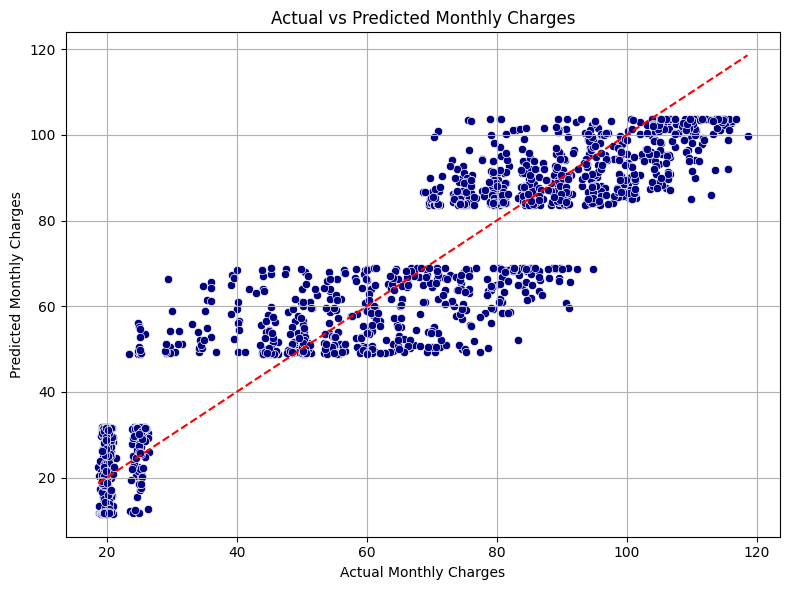

 Feature Coefficients:
Contract_One year: 4.48
Contract_Two year: 6.08
Internetservice_Fiber optic: 34.79
Internetservice_No: -37.33
Paymentmethod_Credit card (automatic): 0.03
Paymentmethod_Electronic check: -0.37
Paymentmethod_Mailed check: -0.20
Tenure: 0.19


In [51]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 2: Load the dataset
df = pd.read_csv('/content/Telco_cleaned_data.csv')
print("Shape of dataset:", df.shape)
print(df.head())

# Step 3: Select features (X) and target (y)
X = df[['Tenure', 'Contract', 'Internetservice', 'Paymentmethod']]
y = df['Monthlycharges']

# Step 4: Preprocess categorical features using OneHotEncoding
# Updated categorical_features with correct column names from the dataframe
categorical_features = ['Contract', 'Internetservice', 'Paymentmethod']
numeric_features = ['Tenure'] # Updated numeric_features with correct column name

# Create a pipeline with preprocessing + Linear Regression
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first'), categorical_features)
], remainder='passthrough')  # 'passthrough' keeps 'tenure'

pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('regressor', LinearRegression())
])

# Step 5: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Fit the model
pipeline.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = pipeline.predict(X_test)

# Step 8: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Evaluation Metrics:")
print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"MSE (Mean Squared Error): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Step 9: Plot actual vs predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='navy', edgecolor='white')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal fit line
plt.xlabel('Actual Monthly Charges')
plt.ylabel('Predicted Monthly Charges')
plt.title('Actual vs Predicted Monthly Charges')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 10: Interpret coefficients
# Extract feature names from OneHotEncoder
feature_names = pipeline.named_steps['preprocess'].transformers_[0][1].get_feature_names_out(categorical_features)
all_feature_names = list(feature_names) + numeric_features #Updated to add numeric_features

coefficients = pipeline.named_steps['regressor'].coef_

print(" Feature Coefficients:")
for name, coef in zip(all_feature_names, coefficients):
    print(f"{name}: {coef:.2f}")